<a href="https://colab.research.google.com/github/dil150898/Bike-Sharing-demand-prediction/blob/main/dil_khush_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**Vaibhav Kumar Gupta
##### **Team Member 2 -**Bhavik Verma
##### **Team Member 3 -**Priyanka Pal
##### **Team Member 4 -**Dil Khush Sharma
##### **Team Member 5 -**Shayan Somanna

# **Project Summary -**

Currently many urban cities have introduced rental bikes to improve mobility comfort (e.g. Rapido and Uber Moto in India). It is critical to make the rental bike available and accessible to the public at the appropriate time, as this reduces waiting time. Eventually, providing a steady supply of rental bikes to the city becomes a major concern. The critical part is predicting the number of bikes needed at each hour to ensure a steady supply of rental bikes.

We performed exploratory data analysis on the provided dataset and discovered numerous findings that will be beneficial to rental bike companies. There are several factors driving the demand for rental bikes. We've selected the most useful features.

We tested several machine learning models to correctly predict bike demand, which will save the company's resources and generate more and more profits.

The goal is to design different Machine Learning models and come up with the model which gives the best prediction of the rented bike count required to be supplied at each hour. Before designing any ML model, we require to clean the data and draw significant insights from the data. To begin with, we view the dataset including its description, various columns, number of null values, different categorical variables, unique value count, the shape of the dataset and different statistical parameters. We begin by removing the null values if any. Then we plot the distributions of each variable to see how the data is distributed. We get an idea about the skewness of the data. Ideally, we want our data to have a normal distribution. If there is skewness in the data we go for feature transformation. Visualizing different kinds of transformation on the skewed variables helps you to determine the best transformation for your features. We can check the numerical value of skewness of the variables using the .skew() method. We also plot a box plot of the features to check the outliers in the data. Outliers play a significant role in data analysis as they affect the statistical parameters. Then we plot the correlation heatmap to check for collinear features. Since collinearity is not desired in the data, we linearly combine the collinear features or drop them. In our project, Year and Dew point temperatures have the highest multi-correlation hence they’re dropped. Moving ahead, we analyze the categorical variables and perform one hot encoding for conversion. The original categorical columns are dropped and we get our final clean dataset. A feature importance graph is plotted to show which features contribute the most to our model. Then we perform the splitting of the data into train-test sets and perform feature scaling. Then we apply LR, Decision Tree, Random forest regression, XG Boost regression, Gradient Boosting and AdaBoost models to get the best model for our business problem. We calculate the evaluation metrics R2 score, adjusted R2 and RMSE for each model. Then a model comparison chart is plotted to compare the metrics.XGBoost with Hypertunning gives the best results of all the models for the given business problem with R2 score=0.927 and adjusted R2 of 0.9267. Also, it has the lowest RMSE of all the models which equals 9.5 on training data and 174.12 on test data.

# **GitHub Link -**

https://github.com/dil150898/Bike-Sharing-demand-prediction

# **Problem Statement**

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.9 MB/s 


In [4]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
sns.set()

from skopt import BayesSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from time import time
from sklearn.metrics import r2_score
import xgboost as xgb

from sklearn.model_selection import cross_val_score

### Dataset Loading

In [5]:
# Load Dataset Vaibhav
path='/content/drive/MyDrive/Almabetter/Capstone Project/Supervised ML - Regression /Bike Sharing Demand Prediction /Bike Sharing Demand Prediction/Dil khush Sharma/Data & Resource/SeoulBikeData.csv'
df=pd.read_csv(path, encoding = 'unicode_escape')

### Dataset First View

In [6]:
# Dataset First Look
df.head(4)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print(f'We have {len(df[df.duplicated()])} duplicate values.')

We have 0 duplicate values.


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print(f'We have {df.isna().sum().sum()} null values.')

We have 0 null values.


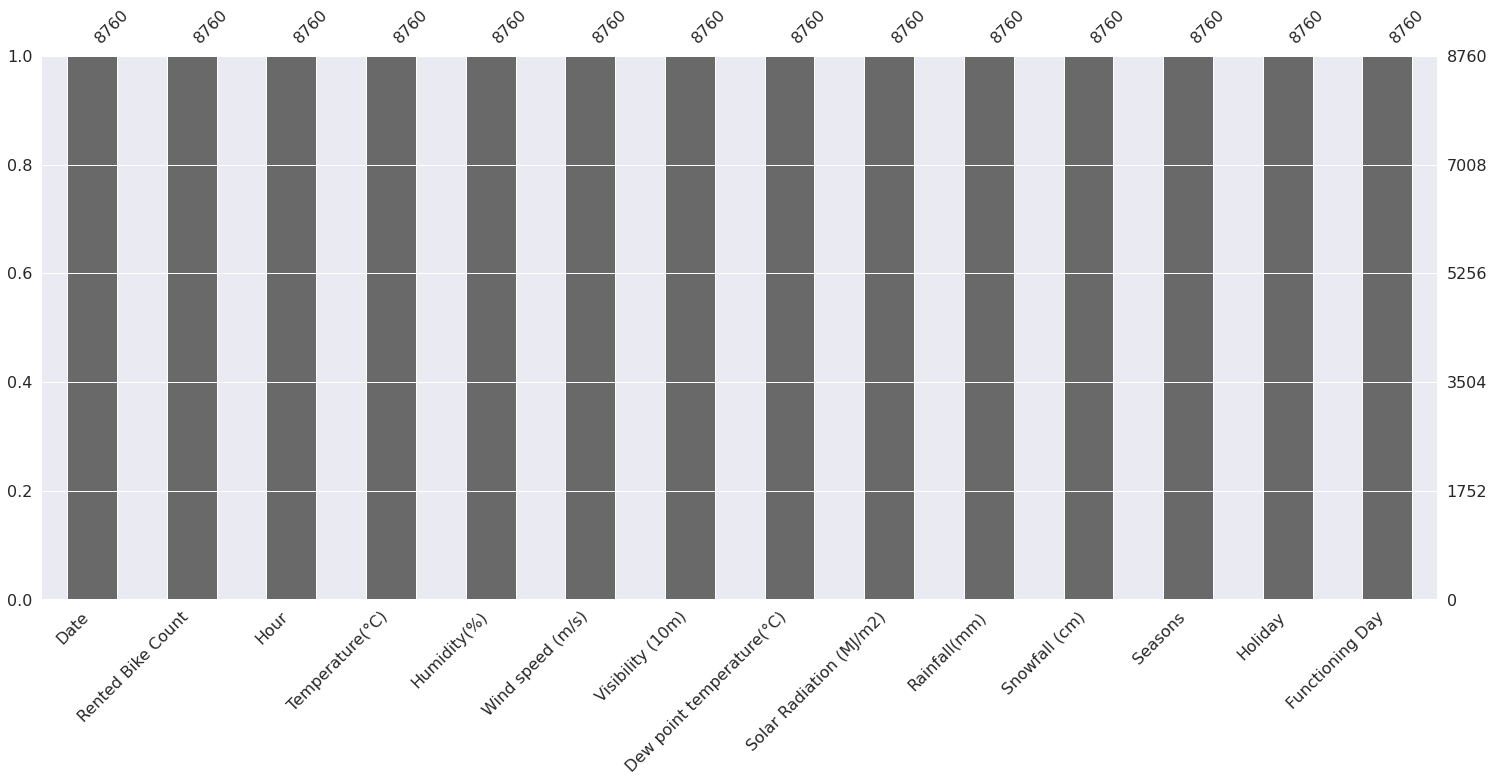

In [12]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

*  Our Dataset contains 8760 instances and 14 columns.
*  This dataset has no null values as well as no duplicate values.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
# return the column labels
result = df.columns

# Print the result
print(result)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [14]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**We can notice Solar Radiation , Rainfall and Snowfall are highly positively skewed.**

### Variables Description 

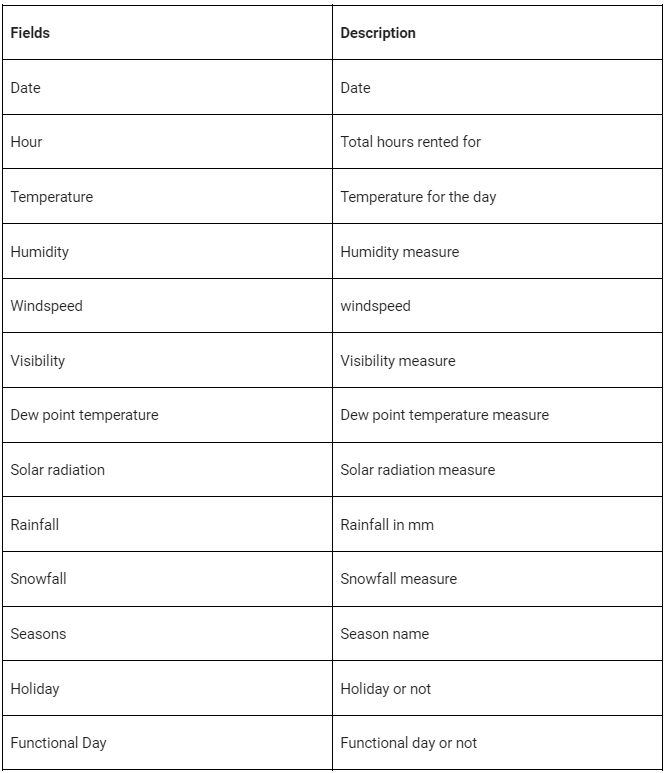

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
# Method-1
df2=pd.unique(df[['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day']].values.ravel('K'))
print(df2)

['01/12/2017' '02/12/2017' '03/12/2017' ... 'Holiday' 'Yes' 'No']


In [17]:
# Method-2
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64